In [1]:
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('housing.csv')

Elimina los máximos

In [3]:
df.median_house_value.max()

500001.0

In [4]:
df = df[df.median_house_value != df.median_house_value.max|()]

## Crea un modelo de regresión lineal simple usando el ingreso y calcula su R2

In [20]:
model_income = linear_model.LinearRegression()
X_income = df[['median_income']]
target = 'median_house_value'
y = df[target]
model_income.fit(X,y)

predictions_income = model_income.predict(X)
r2_score(y_pred = predictions_income, y_true = y)

0.004616870761555925

In [21]:
import numpy as np
np.var(y)

9547053848.477993

In [22]:
np.var(y-predictions_income)

9502976334.70598

## Crea un modelo de regresión lineal simple usando la edad de las casas

In [23]:
model_age = linear_model.LinearRegression()
X_age = df[['housing_median_age']]
model_age.fit(X,y)

predictions_age = model_income.predict(X)
r2_score(y_pred = predictions_income, y_true = y)

0.004616870761555925

## Crea un modelo de regresión lineal multiple usando las variables anteriores

In [24]:
X_multiple = df[['housing_median_age', 'median_income']]
model_multiple = linear_model.LinearRegression()
model_multiple.fit(X_multiple,y)

predicciones_multiple = model_multiple.predict(X_multiple)
r2_score( y_true = y, y_pred = predicciones_multiple)

0.45171387837376886

Escribe la ecuación del modelo

In [27]:
# Interepto
model_multiple.intercept_

-7997.527316094929

In [28]:
# Coeficientes
model_multiple.coef_

array([ 1567.97684924, 42420.02474575])

In [7]:
# Orden


$$Precio = \beta_0 + \beta_1 * x_1 + \beta_2* x_2$$

$$Precio = -10189 + 1744 * edad + 43169* ingreso$$

### Agrega la variable de households

In [31]:
X_multiple2 = df[['housing_median_age', 'median_income','households']]
model_multiple2 = linear_model.LinearRegression()
model_multiple2.fit(X_multiple2,y)

predicciones_multiple2 = model_multiple2.predict(X_multiple2)
r2_score( y_true = y, y_pred = predicciones_multiple2)

0.46916476561401843

Escribe la ecuación del modelo

In [32]:
model_multiple2.intercept_

-35840.77354418335

In [33]:
model_multiple2.coef_

array([1.90691959e+03, 4.25476800e+04, 3.54211223e+01])

### Agrega todas

In [41]:
### Verific los NA's
X = df.copy()
X = X.drop(target, axis = 1)

X = pd.get_dummies(X)

In [43]:
# Quita NA's 
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        200
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [47]:
X['total_bedrooms'] = X.total_bedrooms.fillna(df.total_bedrooms.mean())

In [48]:
model_todo = linear_model.LinearRegression().fit(X,y)

In [49]:
predicciones_todo = model_todo.predict(X)

In [50]:
r2_score(y_pred = predicciones_todo, y_true = y)

0.6119729299497514

In [52]:
coeficientes = pd.DataFrame({
    'names':X.keys(),
    'coeficientes': model_todo.coef_
})

,names,coeficientes
0,longitude,-24146.084691
1,latitude,-22299.970513
2,housing_median_age,911.724587
3,total_rooms,-5.867630
4,total_bedrooms,65.852744
5,population,-31.567024
6,households,68.208927
7,median_income,37911.255132
8,ocean_proximity_<1H OCEAN,-25430.859903
9,ocean_proximity_INLAND,-64411.683654


# Visualizando el modelo, calibración

In [53]:
calibracion = pd.DataFrame({
    'predicciones': predicciones_todo,
    'real': y
})

In [56]:
calibracion['bins'] = pd.qcut(calibracion['predicciones'] , q = 10, labels = False) + 1

In [58]:
grouped_calibracion = calibracion.groupby('bins').mean()

In [60]:
grouped_calibracion['error'] = (grouped_calibracion.predicciones - grouped_calibracion.real) / grouped_calibracion.predicciones

In [61]:
grouped_calibracion

,predicciones,real,error
bins,,,
1,64728.773042,83369.002541,-0.287974
2,108650.963322,109338.739197,-0.006330
3,137060.655146,130383.079268,0.048720
4,159810.781602,149374.529741,0.065304
5,182374.846474,170914.888211,0.062837
6,203225.674833,193673.664972,0.047002
7,223997.964243,218647.635994,0.023886
8,246050.033321,245296.544715,0.003062
9,272028.023621,278532.994408,-0.023913


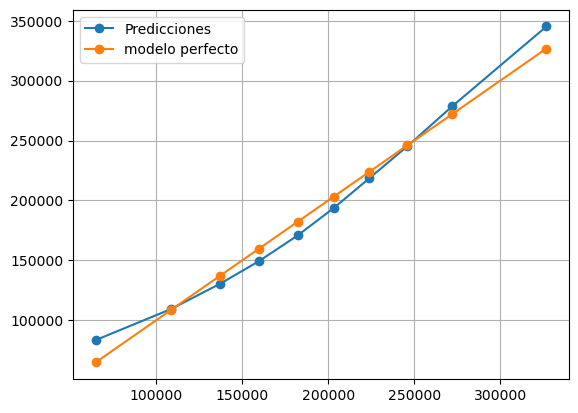

In [64]:
import matplotlib.pyplot as plt
plt.plot(grouped_calibracion.predicciones.values,
         grouped_calibracion.real.values, marker = "o", label="Predicciones")

plt.plot(grouped_calibracion.predicciones.values,
         grouped_calibracion.predicciones.values, marker = "o", label="modelo perfecto")

plt.legend()
plt.grid()

### Compara la calibración de todos los modelos anteriores